### 1. Treinar com p=2%

### 2. Melhoria nos augmentation
 - Crop nas imagens, como na predicao e validacao
 - random crop
 
### 3. Otimizacao dos valores de LR inicial
 - treinar a primeira epoca e verificar o melhor LR
 - verificar para os tres casos, teacher finetune e pseudolabels

### 4. Otimizar o fator k_best na geracao de pseudolabels
 - nao necessariamente 50%
 - pode variar para as diferentes particoes
 
### 5. Repetir os experimentos
 - com os valores encontrados, mais data augmentation, etc

### 6. Reduzir o tamanho inicial do conjunto para 10%
 - 20% de 10%, 10% de 10%, 5% de 10%, 2% de 10%
 - mesmos experimentos

### 7. Escrever um artigo

### 8. Realizar os experimentos para outra patologia (futuramente)
 - sem necessariamente a reducao do conjunto

In [1]:
import os
import sys
#os.chdir('./ChexNet')
os.getcwd()

'/home/roberto/Documents/CheXNet'

In [2]:
import numpy as np
from torchvision.transforms import transforms

In [3]:
total = 50_000

train5 = 5_000   # rotulado
train95 = 45_000 # nao rotulado

total_validacao = 7371
total_teste = 22_000

In [4]:
from packaging import version
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [5]:
def tb_tags(path):
    ea = EventAccumulator(path)
    ea.Reload()
    return ea.Tags()['scalars']
    
def tb_values(path, tag):
    ea = EventAccumulator(path)
    ea.Reload()
    times, steps, vals = zip(*ea.Scalars(tag))
    return times, steps, vals

In [6]:
# 20%

teacher  = 'runs/effusion_train20%_teacher_00'
pseudo   = 'runs/effusion_train20%_pseudolabels_00'
finetune = 'runs/effusion_train20%_finetune_00'


#for folder in [teacher, pseudo, finetune]:
#    print(tb_tags(folder))


data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')

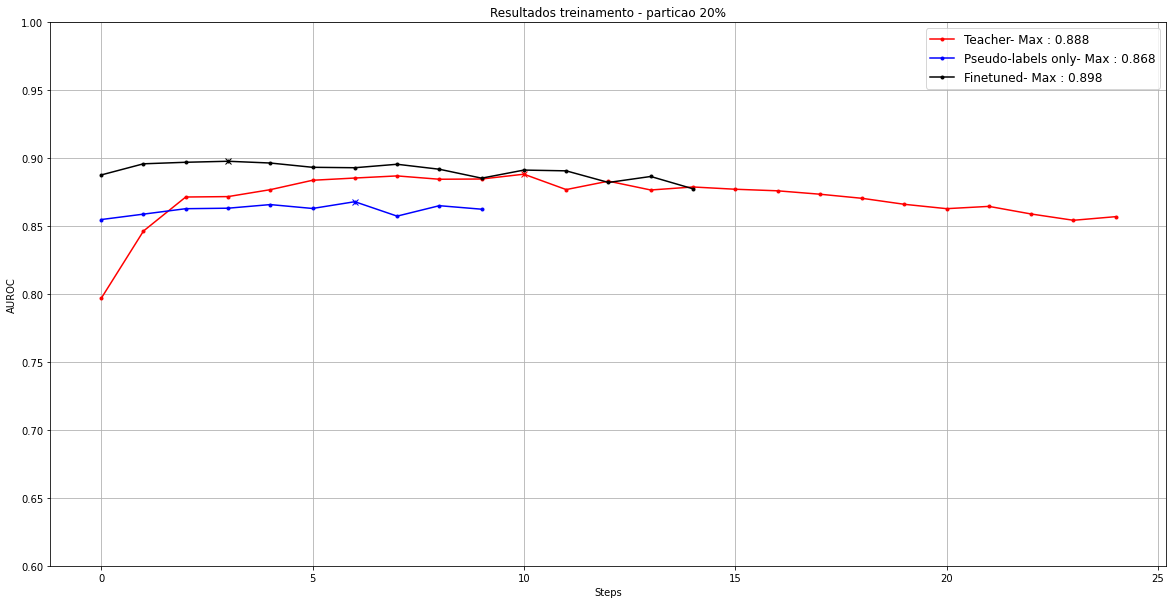

In [7]:
plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])


for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'- Max : {round(data[2][amax], 3)}')    
    plt.plot(amax, data[2][amax], c+'x')
    
plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 20%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images/auroc_20%_partition.png')

In [8]:
# 10%

teacher  = 'runs/effusion_train10%_teacher_00'
pseudo   = 'runs/effusion_train10%_pseudolabels_00'
finetune = 'runs/effusion_train10%_finetune_00'


#for folder in [teacher, pseudo, finetune]:
#    print(tb_tags(folder))


data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')

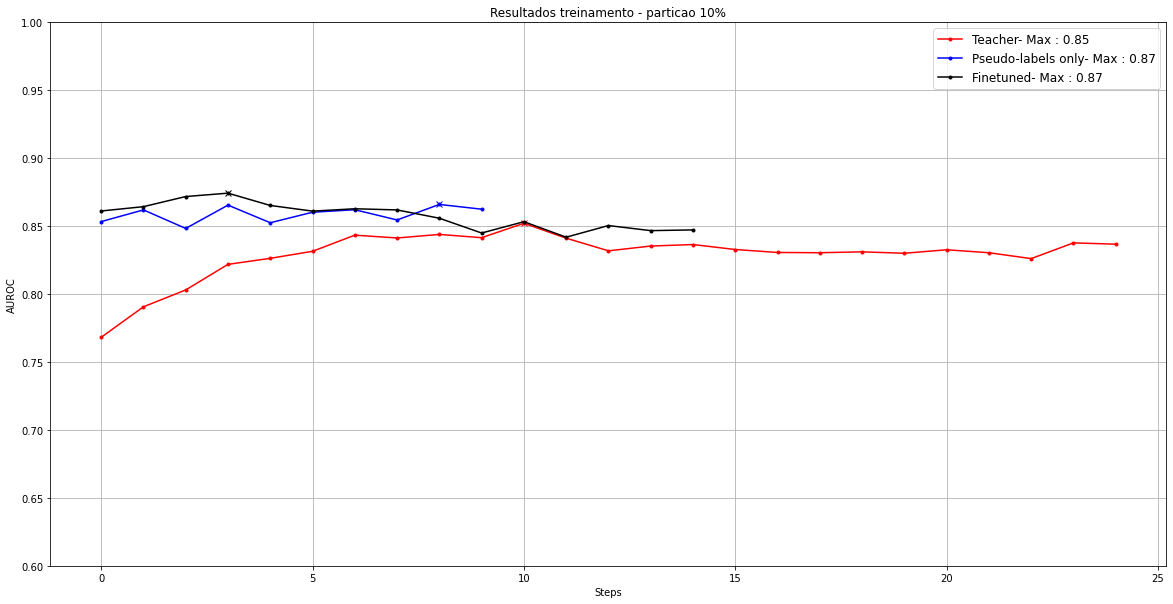

In [9]:
plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])


for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'- Max : {round(data[2][amax], 2)}')    
    plt.plot(amax, data[2][amax], c+'x')
    
plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 10%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images/auroc_10%_partition.png')

In [10]:
# 05%

teacher = './CheXNet/runs/effusion_train05%_teacher_00/'
pseudo = './CheXNet/runs/effusion_train05%_student_pseudolabels_01/'
finetune = './CheXNet/runs/effusion_train05%_student_finetune_00/'


for folder in [teacher, pseudo, finetune]:
    print(tb_tags(folder))


data_teacher = tb_values(teacher, 'auroc/train')
data_pseudo = tb_values(pseudo, 'auroc/train')
data_finetune = tb_values(finetune, 'auroc/train')

DirectoryDeletedError: Directory ./CheXNet/runs/effusion_train05%_teacher_00/ has been permanently deleted

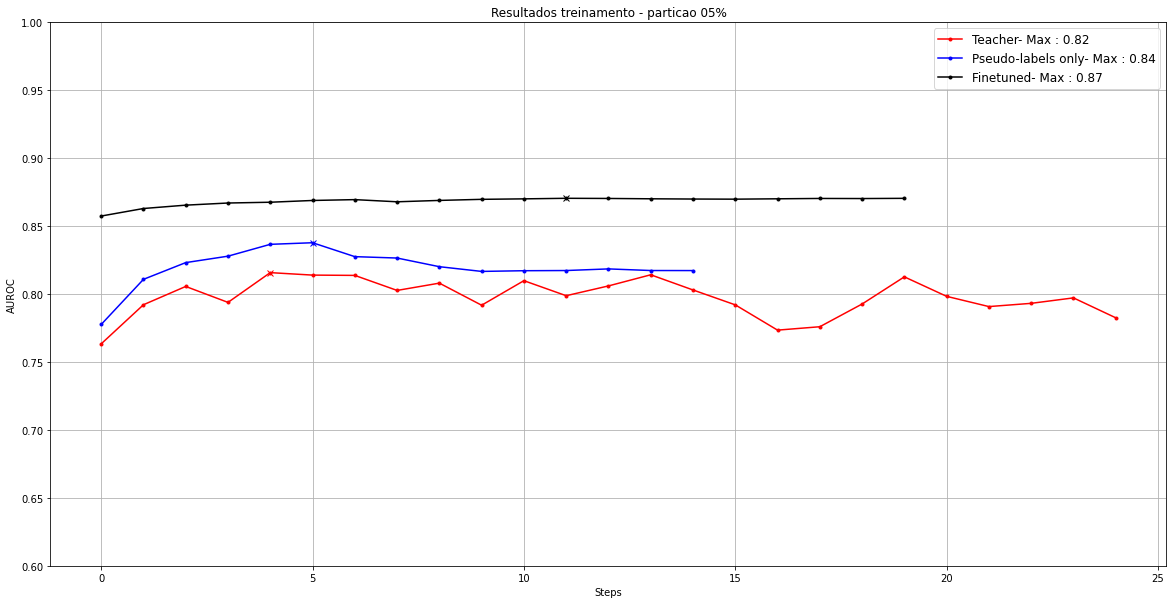

In [27]:
plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])


for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'- Max : {round(data[2][amax], 2)}')    
    plt.plot(amax, data[2][amax], c+'x')
    
plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 05%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images/auroc_05%_partition.png')

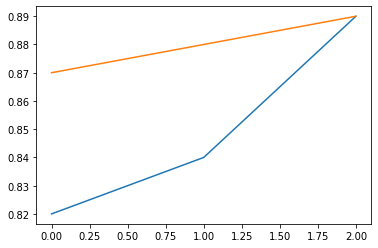

In [33]:
plt.plot([0.82, 0.84, 0.89])
plt.plot([0.87, 0.88, 0.89])